In [1]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import cv2

2023-01-13 22:47:25.956310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 22:47:26.268415: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-13 22:47:26.268489: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-13 22:47:28.063751: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
clear_session()

In [3]:
def msg_to_bin(msg):
    if type(msg)==str:
        return ''.join([format(ord(i),'08b')for i in msg])
    elif type(msg)==bytes or type(msg)==np.ndarray:
        return [format(i,'08b') for i in msg]
    elif type(msg)==int or type(msg)==np.unit8:
        return format(msg,'08b')
    else: 
        raise TypeError("input type not supported")

In [4]:
def hide_message(img,text):
    nbytes=img.shape[0]*img.shape[1]*3//8
    print("maximum bytes ",nbytes)
    if len(text)>nbytes:
        raise ValueError("cross")
    text+="#####"
    dataindex=0
    bin_secret_msg=msg_to_bin(text)
    datalen=len(bin_secret_msg)
    for values in img:
        for pixels in values:
            r,g,b=msg_to_bin(pixels)
            if dataindex<datalen:
                pixels[0]=int(r[:-1]+bin_secret_msg[dataindex],2)
                dataindex+=1
            if dataindex<datalen:
                pixels[1]=int(g[:-1]+bin_secret_msg[dataindex],2)
                dataindex+=1
            if dataindex<datalen:
                pixels[2]=int(b[:-1]+bin_secret_msg[dataindex],2)
                dataindex+=1
            if dataindex>=datalen:
                break
    return img

In [5]:
# Python program implementing Image Steganography

# PIL module is used to extract
# pixels of image and modify it
from PIL import Image

# Convert encoding data into 8-bit binary
# form using ASCII value of characters
def genData(data):

		# list of binary codes
		# of given data
		newd = []

		for i in data:
			newd.append(format(ord(i), '08b'))
		return newd

# Pixels are modified according to the
# 8-bit binary data and finally returned
def modPix(pix, data):

	datalist = genData(data)
	lendata = len(datalist)
	imdata = iter(pix)

	for i in range(lendata):

		# Extracting 3 pixels at a time
		pix = [value for value in imdata.__next__()[:3] +
								imdata.__next__()[:3] +
								imdata.__next__()[:3]]

		# Pixel value should be made
		# odd for 1 and even for 0
		for j in range(0, 8):
			if (datalist[i][j] == '0' and pix[j]% 2 != 0):
				pix[j] -= 1

			elif (datalist[i][j] == '1' and pix[j] % 2 == 0):
				if(pix[j] != 0):
					pix[j] -= 1
				else:
					pix[j] += 1
				# pix[j] -= 1

		# Eighth pixel of every set tells
		# whether to stop ot read further.
		# 0 means keep reading; 1 means thec
		# message is over.
		if (i == lendata - 1):
			if (pix[-1] % 2 == 0):
				if(pix[-1] != 0):
					pix[-1] -= 1
				else:
					pix[-1] += 1

		else:
			if (pix[-1] % 2 != 0):
				pix[-1] -= 1

		pix = tuple(pix)
		yield pix[0:3]
		yield pix[3:6]
		yield pix[6:9]

def encode_enc(newimg, data):
	w = newimg.size[0]
	(x, y) = (0, 0)

	for pixel in modPix(newimg.getdata(), data):

		# Putting modified pixels in the new image
		newimg.putpixel((x, y), pixel)
		if (x == w - 1):
			x = 0
			y += 1
		else:
			x += 1

def encode(img,data):
    #img = input("Enter image name(with extension) : ")
    image=Image.fromarray(img)
    #image = Image.open(img, 'r')

    #data = input("Enter data to be encoded : ")
    if (len(data) == 0):
        raise ValueError('Data is empty')

    newimg = image.copy()
    #print(newimg)
    encode_enc(newimg, data)
    newimg=np.array(newimg)
    return newimg
	#print(newimg)
	#new_img_name = input("Enter the name of new image(with extension) : ")
	#newimg.save(new_img_name, str(new_img_name.split(".")[1].upper()))


In [6]:
def load_real_samples(data):
  X=data
  X = X.astype('float32')
  X=X/255.0
  return X
	# scale from [0,255] to [-1,1]


(50000, 32, 32, 3)
[[[254 255 255]
  [252 253 252]
  [252 252 252]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[113 120 112]
  [111 118 111]
  [105 112 106]
  ...
  [ 72  81  80]
  [ 72  80  79]
  [ 72  80  79]]

 [[111 118 110]
  [104 111 104]
  [ 99 106  98]
  ...
  [ 68  75  73]
  [ 70  76  75]
  [ 78  84  82]]

 [[106 113 105]
  [ 99 106  98]
  [ 95 102  94]
  ...
  [ 78  85  83]
  [ 79  85  83]
  [ 80  86  84]]]


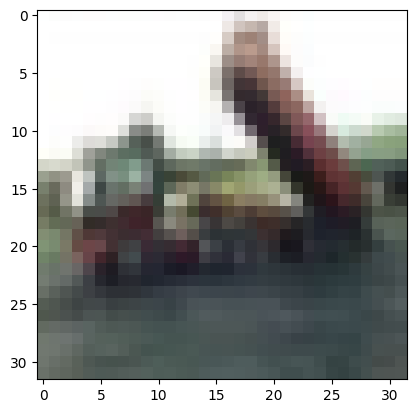

In [7]:
(trainX, _), (_, _) = load_data()
print(trainX.shape)
#print(trainX[0])
data_img=[] 
for i in range(5000):
  #tt=hide_message(trainX[i],"hrithik")
  tt=encode(trainX[i],"hrithik")
  data_img.append(tt)
data_img=np.array(data_img)
plt.imshow(data_img[2])
print(data_img[2])
#print(tt)



In [8]:
print(data_img.shape)

(5000, 32, 32, 3)


In [9]:
def decode(img):
    #img = input("Enter image name(with extension) : ")
    #image = Image.open(img, 'r')
    image=Image.fromarray(img)
    data = ''
    imgdata = iter(image.getdata())

    while (True):
        pixels = [value for value in imgdata.__next__()[:3] +
                                imgdata.__next__()[:3] +
                                imgdata.__next__()[:3]]

        # string of binary data
        binstr = ''

        for i in pixels[:8]:
            if (i % 2 == 0):
                binstr += '0'
            else:
                binstr += '1'

        data += chr(int(binstr, 2))
        if (pixels[-1] % 2 != 0):
            return data


In [10]:
print(data_img[2].shape)
print(data_img[2])

(32, 32, 3)
[[[254 255 255]
  [252 253 252]
  [252 252 252]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[113 120 112]
  [111 118 111]
  [105 112 106]
  ...
  [ 72  81  80]
  [ 72  80  79]
  [ 72  80  79]]

 [[111 118 110]
  [104 111 104]
  [ 99 106  98]
  ...
  [ 68  75  73]
  [ 70  76  75]
  [ 78  84  82]]

 [[106 113 105]
  [ 99 106  98]
  [ 95 102  94]
  ...
  [ 78  85  83]
  [ 79  85  83]
  [ 80  86  84]]]


In [11]:
print(decode(data_img[2]))

hrithik


In [12]:
X2 = (data_img[2] - 127.5) / 127.5
X3=X2*127.5
X3=X3+127.5
print("x2:",X2,"x3:",X3,"data:",data_img[2])

x2: [[[ 0.99215686  1.          1.        ]
  [ 0.97647059  0.98431373  0.97647059]
  [ 0.97647059  0.97647059  0.97647059]
  ...
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  0.98431373]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 1.          1.          1.        ]
  [ 0.99215686  0.99215686  0.99215686]
  [ 0.99215686  0.99215686  0.99215686]
  ...
  [ 0.99215686  0.99215686  0.99215686]
  [ 0.99215686  0.99215686  0.99215686]
  [ 0.99215686  0.99215686  0.99215686]]

 ...

 [[-0.11372549 -0.05882353 -0.12156863]
  [-0.12941176 -0.0745098  -0.12941176]
  [-0.17647059 -0.12156863 -0.16862745]
  ...
  [-0.43529412 -0.36470588 -0.37254902]
  [-0.43529412 -0.37254902 -0.38039216]
  [-0.43529412 -0.37254902 -0.38039216]]

In [13]:
# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare cifar10 training images


# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(data_img)
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

2023-01-13 22:47:39.999209: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithikpaul/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-13 22:47:39.999286: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-13 22:47:39.999335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovoideapad32015ISK6c315432): /proc/driver/nvidia/version does not exist
2023-01-13 22:47:39.999843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow wit

2/2 [==============================] - 1s 341ms/step
>1, 1/39, d1=0.683, d2=0.695 g=0.692
2/2 [==============================] - 1s 239ms/step
>1, 2/39, d1=0.575, d2=0.697 g=0.691
2/2 [==============================] - 0s 262ms/step
>1, 3/39, d1=0.468, d2=0.704 g=0.683
2/2 [==============================] - 1s 225ms/step
>1, 4/39, d1=0.318, d2=0.727 g=0.659
2/2 [==============================] - 1s 267ms/step
>1, 5/39, d1=0.201, d2=0.788 g=0.611
2/2 [==============================] - 1s 298ms/step
>1, 6/39, d1=0.110, d2=0.908 g=0.540
2/2 [==============================] - 1s 262ms/step


KeyboardInterrupt: 

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# plot the generated images
def create_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

# load model
model = load_model('generator_model_990.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
#X = (X + 1) / 2.0
create_plot(X,10)
X = (X*255)
#X=X+127.5
#x22=X[0]
arr0=[]
arr=[]
arr1=[]
arr2=[]
for m in X:
  arr=[]
  for i in m:
    arr1=[]
    for j in i:
      arr2=[]
      for k in j:
        #print(round(k))
        arr2.append(round(k))
      arr1.append(arr2)
    arr.append(arr1)
  arr0.append(arr)
arr0=np.array(arr0)
print(arr0.shape)
  
#print(X[0])
print(X.shape)
plt.imshow(arr0[1])
# plot the result
#create_plot(X, 10)

In [ ]:
def show_data(img):
    bin_data=""
    for values in img:
        for pixels in values:
            r,g,b=msg_to_bin(pixels)
            bin_data+=r[-1]
            bin_data+=g[-1]
            bin_data+=b[-1]
        allbytes=[bin_data[i:i+8]for i in range(0,len(bin_data),8)]
        decodeddata=""
    for bytes in allbytes:
        decodeddata+=chr(int(bytes,2))
        if decodeddata[:-5]=="#####":
            break
    return decodeddata[-5:]

In [ ]:
print(arr0[0].shape,arr0[0])
arr_0=arr0[7].astype(np.uint8)
text=decode(arr_0)
print(text)

In [ ]:
# example of defining a composite model for training the generator model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate,UpSampling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the discriminator model
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_src_image = Input(shape=image_shape)
    # target image input
    in_target_image = Input(shape=image_shape)
    # concatenate images channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C512
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    #d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    #d = BatchNormalization()(d)
    #d = LeakyReLU(alpha=0.2)(d)
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    if dropout:
        g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model: C64-C128-C256-C512-C512-C512-C512-C512
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 128)
    e4 = define_encoder_block(e3, 256)
    #e5 = define_encoder_block(e4, 512)
    #e6 = define_encoder_block(e5, 512)
    #e7 = define_encoder_block(e6, 512)
    # bottleneck, no batch norm and relu
    b = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e4)
    b = Activation('relu')(b)
    # decoder model: CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128
    d1 = decoder_block(b, e4, 64)
    d2 = decoder_block(d1, e3, 128)
    d3 = decoder_block(d2, e2, 128)
    d4 = decoder_block(d3, e1, 256)
    #d5 = decoder_block(d4, e3, 256, dropout=False)
    #d6 = decoder_block(d5, e2, 128, dropout=False)
    #d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d4)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
    # make weights in the discriminator not trainable
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
    # define the source image
    in_src = Input(shape=image_shape)
    # connect the source image to the generator input
    gen_out = g_model(in_src)
    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
    return model


# define image shape
image_shape = (32,32,3)
#latent_dim = 100
# load image data
#dataset =dataset
dataset=load_real_samples(data_img)
#23232
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
    # unpack dataset
    trainA, trainB = dataset[:500],dataset[500:]
    # choose random instances
    ix = randint(0, trainA.shape[0], n_samples)
    # retrieve selected images
    X1, X2 = trainA[ix], trainB[ix]
    print(X1.shape,X2.shape)
    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
    # generate fake instance
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y
# train pix2pix models
def summarize_performance(step, g_model, dataset, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0
    # plot real source images
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
        pyplot.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))
def train(d_model, g_model, gan_model, dataset, n_epochs=10, n_batch=1, n_patch=2):
    # unpack dataset
    trainA, trainB = dataset[:500],dataset[500:]
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        # generate a batch of fake samples
        t=[X_realA, X_realB]
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        # update discriminator for real samples
        print("y_real",y_real.shape,"t",t[0].shape)
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        # update the generator
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        # summarize performance
        print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        if (i+1) % (bat_per_epo * 10) == 0:
            summarize_performance(i,g_model,dataset)
					#summarize_performance(i, g_model, dataset)

# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# summarize the model
gan_model.summary()
# select a batch of real samples
#[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
#X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
# update the generator
#g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
# update discriminator for real samples
#d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
# update discriminator for generated samples
#d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
# generate a batch of fake samples



# load image data
#dataset = 
# train model
train(d_model, g_model, gan_model, dataset)
# plot the model

plot_model(gan_model, to_file='gan_model_plot.png', show_shapes=True, show_layer_names=True)